<a href="https://colab.research.google.com/github/AntonioMello1973/Topicos_Especiais_Mineracao_Dados/blob/master/Exemplo_ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo de Modelagem ETS utilizando a linguagem R**

1) Instalação e carga das bibliotecas necessárias

In [17]:
# Instalação das bibliotecas necessárias
if (!require(readr)) install.packages("readr")
if (!require(lubridate)) install.packages("lubridate")
if (!require(forecast)) install.packages("forecast")
if (!require(Metrics)) install.packages("Metrics")
if (!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)

# Carregando as bibliotecas necessárias
library(readr)
library(lubridate)
library(forecast)
library(Metrics)
library(ggplot2)

2) Obtenção dos dados

In [2]:
# URL do arquivo CSV das séries temporais de venda de combustíveis da ANP
url <- "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/vdpb/vendas-derivados-petroleo-e-etanol/vendas-combustiveis-m3-1990-2024.csv"

# Lendo o arquivo diretamente da URL
dados_anp <- read_csv2(url)

# Visualizando os primeiros registros
head(dados_anp)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 90504 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (4): MÊS, GRANDE REGIÃO, UNIDADE DA FEDERAÇÃO, PRODUTO
dbl (2): ANO, VENDAS

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1990,JAN,REGIÃO NORDESTE,MARANHÃO,ETANOL HIDRATADO,7578.939
1990,JUL,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,24462.251
1990,JUN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,25005.954
1990,MAI,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,18888.239
1990,ABR,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,27535.918
1990,MAR,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,20827.344


3) Filtragem dos dados de interesse (vendas de gasolina no estado de São Paulo a partir de 2012)

In [3]:
# Filtrando apenas os dados do estado de São Paulo, Gasolina e recuperando dados apenas a partir de 2012
dados_sp <- dados_anp[dados_anp$`UNIDADE DA FEDERAÇÃO` == "SÃO PAULO", ]
dados_sp <- dados_sp[dados_sp$PRODUTO == 'GASOLINA C', ]
dados_sp <- dados_sp[dados_sp$ANO >= 2012, ]

# Visualizando os primeiros registros
head(dados_sp)

ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
2012,DEZ,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,947644.8
2012,NOV,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,851044.1
2012,OUT,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,897376.9
2012,SET,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,826753.4
2012,AGO,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,889791.1
2012,JUL,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,839052.0


4) Criando uma nova coluna de datas, com base nas colunas ANO e MÊS

In [4]:
# Criando uma nova coluna de datas, com base nas colunas ANO e MÊS
# 1. Substituir os meses por números correspondentes
dados_sp$MÊS <- gsub("JAN", "01", dados_sp$MÊS)
dados_sp$MÊS <- gsub("FEV", "02", dados_sp$MÊS)
dados_sp$MÊS <- gsub("MAR", "03", dados_sp$MÊS)
dados_sp$MÊS <- gsub("ABR", "04", dados_sp$MÊS)
dados_sp$MÊS <- gsub("MAI", "05", dados_sp$MÊS)
dados_sp$MÊS <- gsub("JUN", "06", dados_sp$MÊS)
dados_sp$MÊS <- gsub("JUL", "07", dados_sp$MÊS)
dados_sp$MÊS <- gsub("AGO", "08", dados_sp$MÊS)
dados_sp$MÊS <- gsub("SET", "09", dados_sp$MÊS)
dados_sp$MÊS <- gsub("OUT", "10", dados_sp$MÊS)
dados_sp$MÊS <- gsub("NOV", "11", dados_sp$MÊS)
dados_sp$MÊS <- gsub("DEZ", "12", dados_sp$MÊS)

# 2. Criar a coluna de data
dados_sp$Data <- dmy(paste("01", dados_sp$MÊS, dados_sp$ANO))

# 3. Ordenar o dataframe em ordem crescente de data
dados_sp <- dados_sp[order(dados_sp$Data), ]

# 4. Exibir as primeiras e últimas linhas do dataframe atualizado
head(dados_sp)
tail(dados_sp)

ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS,Data
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<date>
2012,01,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,808199.9,2012-01-01
2012,02,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,809679.5,2012-02-01
2012,03,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,887627.9,2012-03-01
2012,04,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,838506.2,2012-04-01
2012,05,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,865521.0,2012-05-01
2012,06,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,844647.9,2012-06-01


ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS,Data
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<date>
2024,06,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,765536.2,2024-06-01
2024,07,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,791770.7,2024-07-01
2024,08,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,819095.1,2024-08-01
2024,09,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,750294.3,2024-09-01
2024,10,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,753049.8,2024-10-01
2024,11,REGIÃO SUDESTE,SÃO PAULO,GASOLINA C,701210.2,2024-11-01


5) Treinando e testando o modelo ETS

In [18]:

# Criando a série temporal no formato correto
dados <- ts(dados_sp$VENDAS, start = c(2012, 1), frequency = 12)

# Separando a série em treino (excluindo os "m" meses finais) e teste ("m" meses finais)
meses_teste <- 12
n <- length(dados) - meses_teste
n_treino <- floor(n)
treino <- window(dados, end = c(2012 + (n_treino - 1) %/% 12, (n_treino - 1) %% 12 + 1))
teste <- window(dados, start = c(2012 + n_treino %/% 12, n_treino %% 12 + 1))

# Ajustando o modelo ETS nos dados de treino
modelo_ets <- ets(treino)

# Fazendo previsões com base no modelo ajustado
previsoes <- forecast(modelo_ets, h = length(teste))

# Calculando a métrica SMAPE
SMAPE <- mean(abs(previsoes$mean - teste) / ((abs(previsoes$mean) + abs(teste)) / 2)) * 100

# Exibindo a métrica de desempenho SMAPE
cat("SMAPE (CALCULADO CONFORME BASE DE TESTE =", round(SMAPE, 2), "%" ,"\n")

SMAPE (CALCULADO CONFORME BASE DE TESTE = 4.33 % 


6) Exibindo gráfico com os resultados

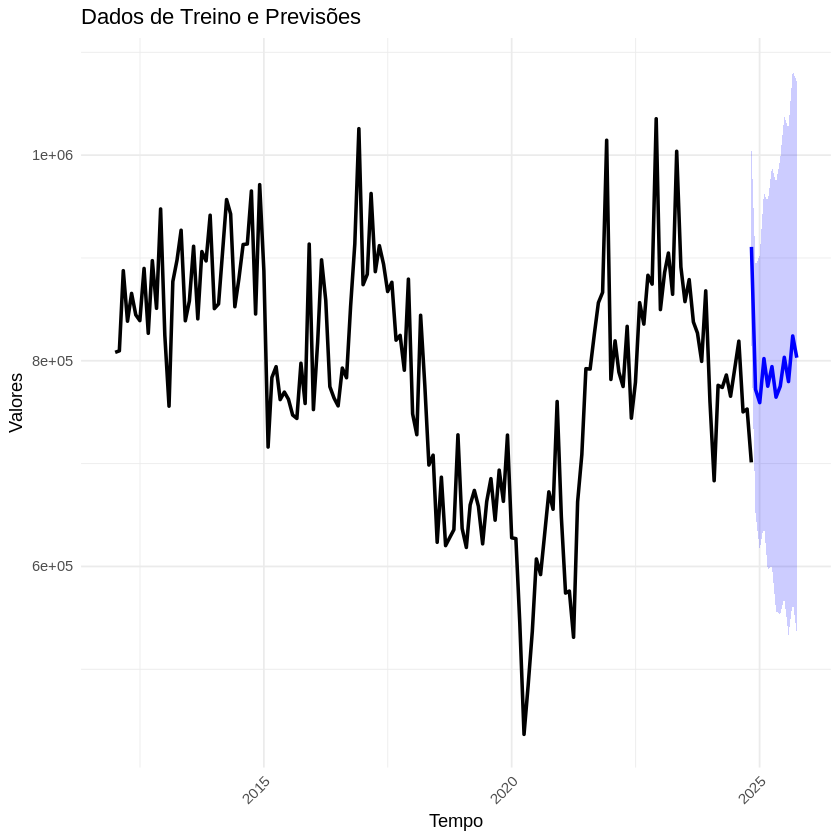

In [8]:
# Convertendo dados para um data.frame (necessário para ggplot2)
dados_df <- data.frame(
  Tempo = seq.Date(from = as.Date("2012-01-01"), by = "month", length.out = length(dados)),
  Valores = as.numeric(dados)
)

previsoes_df <- data.frame(
  Tempo = seq.Date(from = max(dados_df$Tempo) + 1, by = "month", length.out = length(previsoes$mean)),
  Previsoes = as.numeric(previsoes$mean),
  IC_Superior = previsoes$upper[, 2],
  IC_Inferior = previsoes$lower[, 2]
)

# Criando o gráfico
library(ggplot2)
ggplot() +
  geom_line(data = dados_df, aes(x = Tempo, y = Valores), color = "black", size = 1) +
  geom_line(data = previsoes_df, aes(x = Tempo, y = Previsoes), color = "blue", linewidth = 1) +
  geom_ribbon(data = previsoes_df, aes(x = Tempo, ymin = IC_Inferior, ymax = IC_Superior), fill = "blue", alpha = 0.2) +
  labs(title = "Dados de Treino e Previsões", x = "Tempo", y = "Valores") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))